In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install tensorflow numpy pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [3]:
# Correct path to the dataset
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

# Display the first few rows
print(df.head())

# Check the distribution of sentiments
print(df['airline_sentiment'].value_counts())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

<ipython-input-5-2e7e31eb758f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
<ipython-input-5-2e7e31eb758f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only


In [6]:
df.head(5) 


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercials to ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica its really aggressive to blast o...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica and its a really big bad thing a...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,virginamerica seriously would pay 30 a flight ...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,virginamerica yes nearly every time i fly vx t...,NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


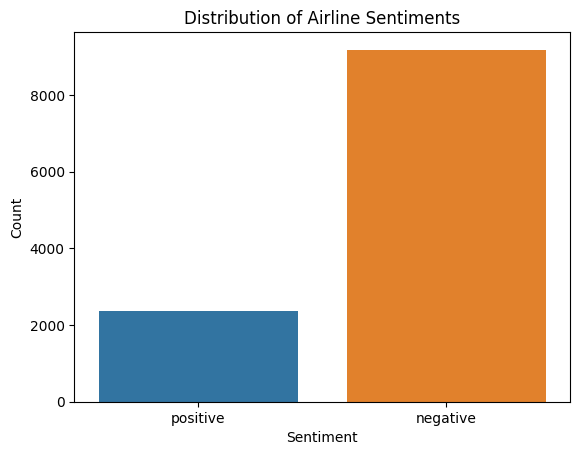

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'airline_sentiment' column
sns.countplot(x='airline_sentiment', data=df)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Airline Sentiments')

# Show the plot
plt.show()

In [8]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the cleaned text
print(df['cleaned_text'].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
1    virginamerica plus youve added commercials exp...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
5    virginamerica seriously would pay flight seats...
6    virginamerica yes nearly every time fly vx ear...
Name: cleaned_text, dtype: object


<ipython-input-8-25b5420765bd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(preprocess_text)


In [9]:
# Map sentiment labels to numerical values
sentiment_mapping = {'negative': 0,  'positive': 1}
df['sentiment'] = df['airline_sentiment'].map(sentiment_mapping)

# Display the encoded sentiment labels
print(df['sentiment'].value_counts())

sentiment
0    9178
1    2363
Name: count, dtype: int64


<ipython-input-9-62f73ec24818>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['airline_sentiment'].map(sentiment_mapping)


In [10]:
df['cleaned_text'] = df['text'].apply(preprocess_text)


<ipython-input-10-02d43d8ca135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(preprocess_text)


In [11]:
print(df[['airline_sentiment', 'sentiment']].head())


  airline_sentiment  sentiment
1          positive          1
3          negative          0
4          negative          0
5          negative          0
6          positive          1


In [12]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)}")
print(f"Testing data: {len(X_test)}")

Training data: 9232
Testing data: 2309


In [13]:
# Initialize a Tokenizer
max_features = 10000  # Number of words to consider as features
maxlen = 100  # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)

In [15]:
input_length = X_train_padded.shape[1]


In [16]:
print("Shape of X_train_padded:", X_train_padded.shape)
print("Sample of X_train_padded:", X_train_padded[0])


Shape of X_train_padded: (9232, 100)
Sample of X_train_padded: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    3   66 1382  435  522   93 3159  310  700  138 3160
  270   67]


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout

# Define hyperparameters
max_features = 10000  # Number of words to consider as features
embed_dim = 128       # Embedding dimension
lstm_out = 196        # LSTM output dimension
input_length = X_train_padded.shape[1]  # Length of input sequences

# Build the model
model = tf.keras.Sequential([
    Embedding(max_features, embed_dim, input_shape=(input_length,)),  # Embedding layer
    SpatialDropout1D(0.5),  # Spatial dropout for embeddings
    LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3),  # LSTM layer with dropout
    Dropout(0.2),  # Dropout for regularization
    Dense(100, activation='relu'),  # Fully connected layer with ReLU activation
    Dropout(0.4),  # Dropout for regularization
    Dense(3, activation='softmax')  # Output layer with softmax activation (3 classes)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 196)                 │         254,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 196)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          19,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,554,803 (5.93 MB)

 Trainable params: 1,554,803 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train_padded, y_train, 
                    batch_size=32, 
                    epochs=10, 
                    validation_data=(X_test_padded, y_test))

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 45s 138ms/step - accuracy: 0.7892 - loss: 0.5507 - val_accuracy: 0.9104 - val_loss: 0.2303
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.9253 - loss: 0.2036 - val_accuracy: 0.9164 - val_loss: 0.2226
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.9481 - loss: 0.1426 - val_accuracy: 0.9147 - val_loss: 0.2405
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9676 - loss: 0.0967 - val_accuracy: 0.9160 - val_loss: 0.2651
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.9731 - loss: 0.0806 - val_accuracy: 0.9164 - val_loss: 0.2667
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 136ms/step - accuracy: 0.9812 - loss: 0.0568 - val_accuracy: 0.9164 - val_loss: 0.3395
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.9835 - loss: 0.0519 - val_accuracy: 0.9134 - val_loss: 0.3293
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.9871 - loss: 0

In [19]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9214 - loss: 0.3900
Test Loss: 0.4122216999530792
Test Accuracy: 0.9133824110031128


In [22]:
sample_text = "The service was terrible and the flight was delayed for hours."
sample_text = preprocess_text(sample_text)
sample_sequence = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_sequence, maxlen=input_length)
prediction = model.predict(sample_padded)
predicted_class = np.argmax(prediction)
sentiment_labels = ['negative', 'positive']
print('Predicted sentiment:', sentiment_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted sentiment: negative


In [24]:
sample_text = "The flight was amazing and the staff was very friendly!"
sample_text = preprocess_text(sample_text)
sample_sequence = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_sequence, maxlen=input_length)
prediction = model.predict(sample_padded)
predicted_class = np.argmax(prediction)
sentiment_labels = ['negative', 'positive']
print('Predicted sentiment:', sentiment_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted sentiment: positive
